<a href="https://colab.research.google.com/github/jimtzhou/303_351_joint/blob/master/ME_303_Project_1_Part_2_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
import random
from sympy import *
from numpy.linalg import inv

In [73]:
def lambda_solve_condensed (v2, c_guess): # Iterates lambda_solve until c is within tolerance
  c = c_guess + (TOL * 2) # Initial condition to run while loop
  Re = reynolds(v2) # Solves for Reynolds
  print(Re)
  while (abs(c_guess - c) > TOL): # While the guesses are not within tolerance
    c_guess = c # Overwrites old guess with new
    c = -2 * (math.log10(((2.51 * c_guess)/Re ) + d)) #solves for a new lambda
  
  return c # Returns the converged values for C (aka 1/lambda^2)


lmao this code better work

In [74]:
#Global Variables

g = 9.81
d2 = 0.0055
nu = 1.004e-6
k = 1.5e-6
rho = 1
TOL = 0.01
A2 = 2.3758e-5
A1 = 6.666e-3
d = k / (d2 * 3.72)
D1 = 0.092127
k1 = 0.42*(1-((d2**2)/(D1**2)))
re_results = []


#All the functions will be written here please

def reynolds (v2):
  #print(v2, "Current V2 Reynolds Function")
  return v2 * d2 / nu # Calculates Renolds numbers based on V2 input

def lambda_solve (Re, c_guess,locker): #Calculates the lambda function based on Renolds and the guessed value of C. Poops out a new guess
  #if (Re < 2300):
    #locker=True
    #c = sqrt(Re/64)
    #print ("Laminar")
  #if (locker==true) or (c_guess <= 0):
    #c = sqrt(Re/64)
    #print ("Laminar")
  #else:
  c = -2 * (math.log10(((2.51 * c_guess)/Re ) + d))
    #print ("Turbulent")


  #print('c value')
  #print(c)
  return c, locker
  
def lambda_iteration (v2, c_guess, locker): # Iterates lambda_solve until c is within tolerance
  c = c_guess + (TOL * 2) # Initial condition to run while loop
  #print(v2, "Lambda Function")
  Re = reynolds(v2) # Solves for Reynolds
  #print(Re, "Current Reynolds Number")
  re_results.append(Re)
  
  while (abs(c_guess - c) > TOL): # While the guesses are not within tolerance
    c_guess = c # Overwrites old guess with new
    c,locker = lambda_solve(Re, c_guess, locker) #solves for a new lambda
      
  return c # Returns the converged values for C (aka 1/lambda^2)

def v2_solve (z, c, L): #c comes from lambda_solve
  LS = 2 * rho * g * z
  RS = (rho + ((1/c**2) * (L/d2)) + k1 - (rho * (A2**2))/A1**2)
  #print (sqrt(LS / RS))
  
  return sqrt(LS / RS)
    
def h_prime(z, v2_guess, c_guess, L, locker):
  v2_new = v2_guess + (TOL * 2)

  while (abs(v2_new - v2_guess) > TOL):
    v2_guess = v2_new
    c = lambda_iteration(v2_guess, c_guess, locker)
    v2_new = v2_solve(z, c, L)
    #print ("New V2 Solve and V2 value is:", v2_new )
   
  #print('new V2 Iteration')
  
  return -(A2 * v2_new) / A1

def RK4(z, dt, v2_guess, c_guess, L, locker):
  s1 = h_prime(z, v2_guess, c_guess, L, locker)
  s2 = h_prime(z + (0.5 * s1) * dt, v2_guess, c_guess, L, locker)
  s3 = h_prime(z + (0.5 * s2) * dt, v2_guess, c_guess, L, locker)
  s4 = h_prime(z + (s3 * dt), v2_guess, c_guess, L, locker)
  
  return (dt * (s1 + 2*s2 + 2*s3 + s4)) / 6   # This is the better slope

# Main code
delta_t = 0.1
time_range = 110
iterations = int(time_range/delta_t)
time = np.arange (0.0, time_range, delta_t)
#v2_guess = 5.0
#c_guess = 6.0 # Assumes Re of 2000
L = [0.02,0.06,0.1,0.14,0.18]
#locker = False

#h = 0.3 - 0.044
H = np.zeros((iterations,2,5))
for k in range(5):
  i = 0
  v2_guess = 5.0
  c_guess = 6.0 # Assumes Re of 2000
  locker = False
  h = 0.3 - 0.044
  for t in time:

    H[i,0,k] = t
    h = h + RK4(h, delta_t, v2_guess, c_guess, L[k], locker)
    H[i,1,k] = h
    #print(H[i,1])
    #print(RK4(h, delta_t, v2_guess, c_guess, L))
    if h < 1e-4:
      break
    i += 1
  print ("New Length")



New Length
New Length
New Length
New Length
New Length


0.0


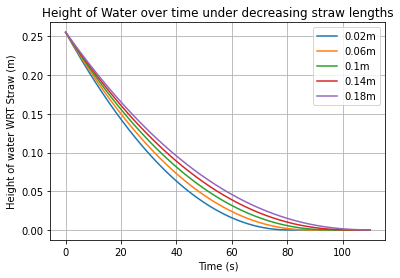

In [75]:
plt.plot(time, H[:,1,0])
plt.plot(time, H[:,1,1])
plt.plot(time, H[:,1,2])
plt.plot(time, H[:,1,3])
plt.plot(time, H[:,1,4])
plt.legend(['0.02m', '0.06m', '0.1m', '0.14m', '0.18m'], loc = 'upper right')
#plt.legend(h)
plt.title("Height of Water over time under decreasing straw lengths")
plt.xlabel("Time (s)")
plt.grid(True)
plt.ylabel("Height of water WRT Straw (m)")
#plt.yticks(np.arange(0, 0.1, 0.001))
for i in range (iterations):
  if H[i,1,4] < 3.7e-3:
    print (H[i,0,2])
    break

In [76]:
# Main code
delta_t = [10,1,0.1,0.01]
time_range = 70
#iterations = int(time_range/delta_t)
#time = np.arange (0.0, time_range, delta_t)
#v2_guess = 5.0
#c_guess = 6.0 # Assumes Re of 2000
L = [0.02,0.06,0.1,0.14,0.18]
#locker = False

#h = 0.3 - 0.044
grid_results1 = np.zeros((int(time_range/delta_t[0]),2))
grid_results2 = np.zeros((int(time_range/delta_t[1]),2))
grid_results3 = np.zeros((int(time_range/delta_t[2]),2))
grid_results4 = np.zeros((int(time_range/delta_t[3]),2))

######################
i = 0
v2_guess = 5.0
c_guess = 6.0 # Assumes Re of 2000
locker = False
h = 0.3 - 0.044
time = np.arange (0.0, time_range, delta_t[0])
for t in time:
  grid_results1[i,0] = t
  h = h + RK4(h, delta_t[0], v2_guess, c_guess, L[0], locker)
  grid_results1[i,1] = h
    #print(H[i,1])
    #print(RK4(h, delta_t, v2_guess, c_guess, L))
  if h < 1e-4:
    break
  i += 1
print ("New Length")
######################

######################
i = 0
v2_guess = 5.0
c_guess = 6.0 # Assumes Re of 2000
locker = False
h = 0.3 - 0.044
time = np.arange (0.0, time_range, delta_t[1])
for t in time:
  grid_results2[i,0] = t
  h = h + RK4(h, delta_t[1], v2_guess, c_guess, L[0], locker)
  grid_results2[i,1] = h
    #print(H[i,1])
    #print(RK4(h, delta_t, v2_guess, c_guess, L))
  if h < 1e-4:
    break
  i += 1
print ("New Length")
######################

######################
i = 0
v2_guess = 5.0
c_guess = 6.0 # Assumes Re of 2000
locker = False
h = 0.3 - 0.044
time = np.arange (0.0, time_range, delta_t[2])
for t in time:
  grid_results3[i,0] = t
  h = h + RK4(h, delta_t[2], v2_guess, c_guess, L[0], locker)
  grid_results3[i,1] = h
    #print(H[i,1])
    #print(RK4(h, delta_t, v2_guess, c_guess, L))
  if h < 1e-4:
    break
  i += 1
print ("New Length")
######################

######################
i = 0
v2_guess = 5.0
c_guess = 6.0 # Assumes Re of 2000
locker = False
h = 0.3 - 0.044
time = np.arange (0.0, time_range, delta_t[3])
for t in time:
  grid_results4[i,0] = t
  h = h + RK4(h, delta_t[3], v2_guess, c_guess, L[0], locker)
  grid_results4[i,1] = h
    #print(H[i,1])
    #print(RK4(h, delta_t, v2_guess, c_guess, L))
  if h < 1e-4:
    break
  i += 1
print ("New Length")
######################

New Length
New Length
New Length
New Length


Text(0, 0.5, 'Height of water WRT Straw (m)')

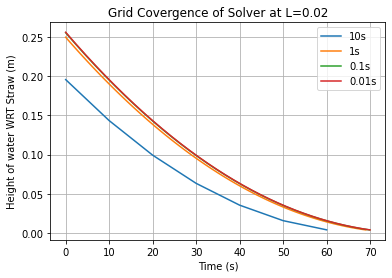

In [77]:
#print (grid_results1)
#print (grid_results2)

plt.plot(np.arange (0.0, time_range, delta_t[0]),grid_results1[:,1])
plt.plot(np.arange (0.0, time_range, delta_t[1]),grid_results2[:,1])
plt.plot(np.arange (0.0, time_range, delta_t[2]),grid_results3[:,1])
plt.plot(np.arange (0.0, time_range, delta_t[3]),grid_results4[:,1])

plt.title("Grid Covergence of Solver at L=0.02")
plt.legend(['10s','1s', '0.1s', '0.01s'], loc = 'upper right')
plt.xlabel("Time (s)")
plt.grid(True)
plt.ylabel("Height of water WRT Straw (m)")